<a href="https://colab.research.google.com/github/onderkilinc/ML-LDA-/blob/main/Statistical_Machine_Learning_PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 6

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalise the data from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [ ]:
(X,y) = load_wine(return_X_y = True, as_frame = True)
(n, p) = X.shape # number of examples and dimension of each example
K = y.unique().size # number of classes
print('n=', n, ', p=', p, ', K=', K)
Xy = pd.concat([X, y], axis=1) # X and y in a single data frame

n= 178 , p= 13 , K= 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20) #splits data into training and testing
lda = LinearDiscriminantAnalysis() #applies LDA
lda.fit(X_train, y_train) #fits lda onto trainign data
y_predict_train = lda.predict(X_train) #predictions on training set
training_error = np.mean(y_predict_train != y_train) #calculates training error
print("Training Error:", training_error)

Training Error: 0.0


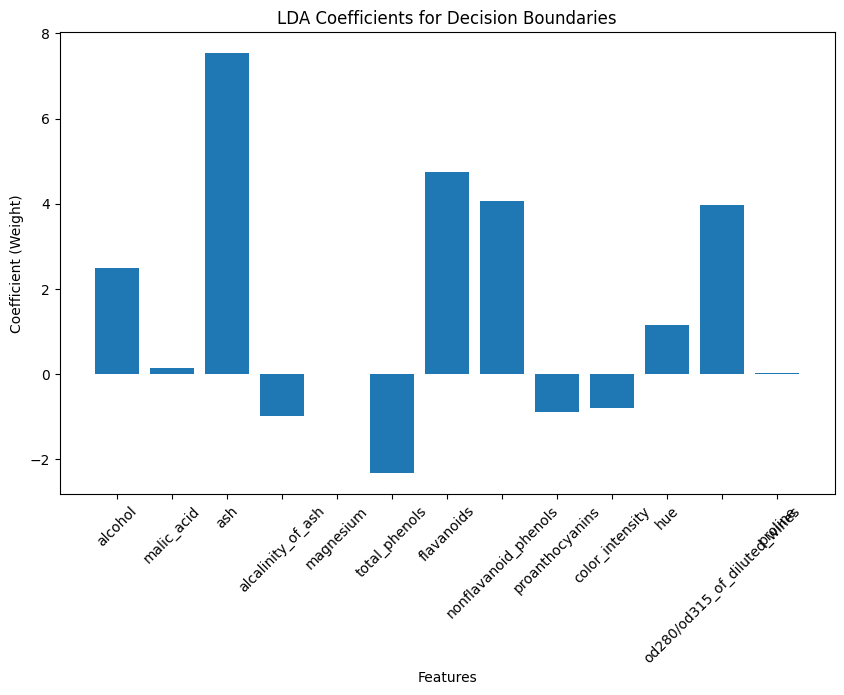

In [ ]:
coefficients = lda.coef_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients[0]) # bar chart
plt.title('LDA Coefficients for Decision Boundaries') #titles the bar chart
plt.xlabel('Features') # labels x-axis
plt.ylabel('Coefficient (Weight)') #labels y-axis
plt.xticks(rotation=45) # readability of x-axis labels
plt.show()

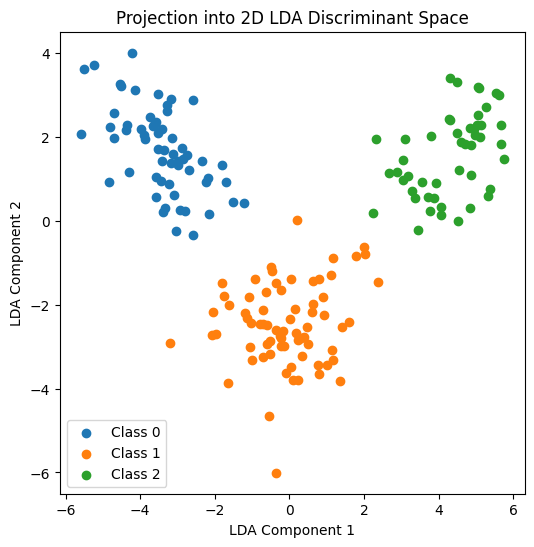

In [ ]:
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f'Class {label}') #plots each class seperately
plt.title('Projection into 2D LDA Discriminant Space') #title for graph
plt.xlabel('LDA Component 1') #x-axis label
plt.ylabel('LDA Component 2') #y-axis label
plt.legend() #provides key
plt.show()

Question 7

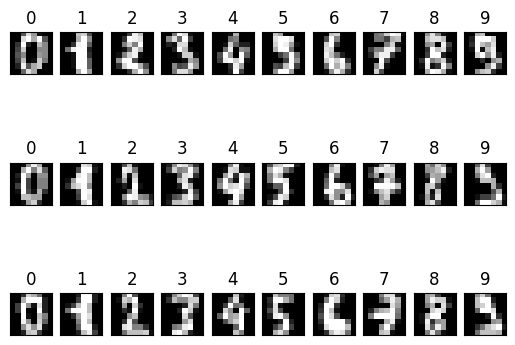

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
(X, y) = load_digits(return_X_y=True, as_frame=True, n_class = 10)
for i in range(30):
       plt.subplot(3, 10, i + 1)
       image = X.loc[i,:].to_numpy()
       plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
       plt.title(y[i])
       plt.xticks(())
       plt.yticks(())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) #applies and fits LDA
y_pred_train = lda.predict(X_train)
y_pred_test = lda.predict(X_test) #predict labels for both training and testing data
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(train_accuracy)
print(test_accuracy)

0.9766146993318485
0.946607341490545


In [ ]:
plt.figure(figsize=(8, 6))
for label in range(10):
    plt.scatter(X_train[y_pred_train == label, 0], X_train[y_pred_train == label, 1], label=f'Class {label}')
plt.title('Projection of training data into 2D LDA discriminant space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

InvalidIndexError: ignored

<Figure size 800x600 with 0 Axes>

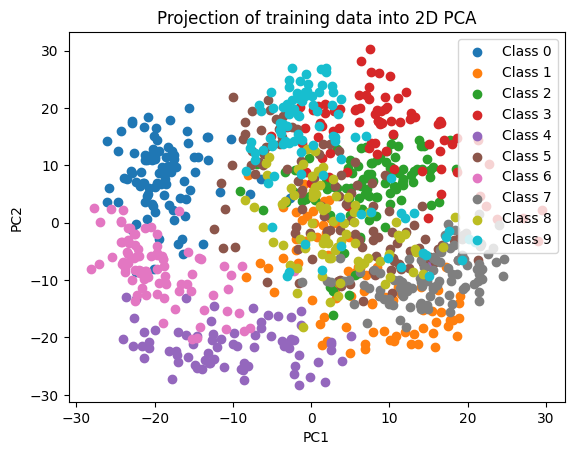

In [ ]:
pca = PCA(n_components=2) #pca for first two components
X_train_pca = pca.fit_transform(X_train) #pca on training data

for label in range(10):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')

plt.title('Projection of training data into 2D PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.0) #qda with no regularisation
qda.fit(X_train, y_train) #fits qda on training data

y_prediction_train = qda.predict(X_train) #prediction for training
y_prediction_test = qda.predict(X_test) #prediction for testing

train_accuracy = accuracy_score(y_train, y_prediction_train) #accuracy for training
test_accuracy = accuracy_score(y_test, y_prediction_test) #accuracy for testing
print(train_accuracy)
print(test_accuracy)

0.920935412026726
0.7864293659621802


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
